In [1]:
###########################################
# --------------------------------------- #
#      Sistema de resortes acoplados      #
# --------------------------------------- #
#
# __________Jessica Isamar Uriarte Garcia #
# ____________________________ Abril 2018 #
###########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.integrate import odeint
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties

In [2]:
################
## Ejemplo 2.2 #
################


def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1) + k2 * (x2 - x1)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1)) / m2]
    return f

In [3]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 6
k2 = 4.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -2.0
y1 = 0.0
x2 = 1.0
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 25
numpoints = 1250

# Create the time samples for the output of the ODE solver.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)


with open('two_springs2.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

In [4]:
print(wsol)

[[-2.          0.          1.          0.        ]
 [-1.99519425  0.47999956  0.99759713 -0.23999978]
 [-1.9808001   0.9576923   0.99040005 -0.47884615]
 ..., 
 [-0.14003091 -6.91085378  0.07001546  3.45542689]
 [-0.27791137 -6.86064009  0.13895568  3.43032005]
 [-0.41445623 -6.77745548  0.20722811  3.38872774]]


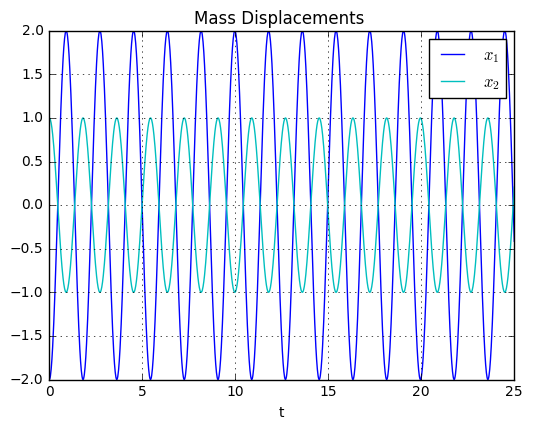

In [5]:
%matplotlib inline 
t, x1, xy, x2, y2 = loadtxt('two_springs2.dat', unpack=True)
lw = 1

figure(1, figsize=(6, 4.5))
plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'c', linewidth=lw)
title('Mass Displacements ')
legend((r'$x_1$', r'$x_2$'))
xlabel('t')
grid(True)
savefig('ejem2.2_plot.png', dpi=100)

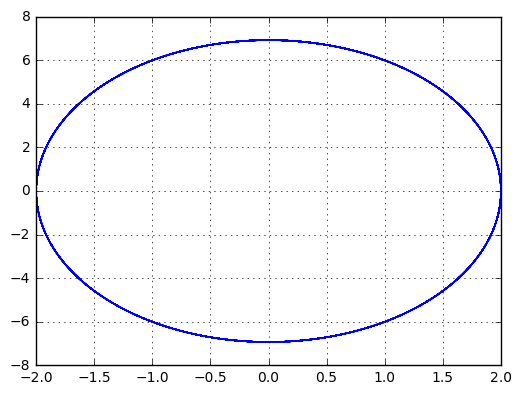

In [6]:
figure(2, figsize=(6, 4.5))
plot(x1,xy)
grid(True)
matplotlib.pyplot.axis('on')
savefig('ejem2.2_plot2.png', dpi=100)

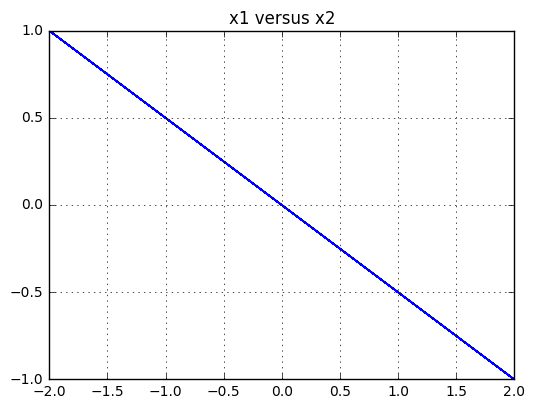

In [7]:
figure(3, figsize=(6, 4.5))
plot(x1,x2)
grid(True)
matplotlib.pyplot.axis('on')
title('x1 versus x2')
savefig('ejem2.2_plot3.png', dpi=100)